# 코나 화재

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.express as px
from plotly import graph_objects as go

In [29]:
def filter_by_title_w_keyword(df, keywords):
    temp = []
    for keyword in keywords:
        temp.append(df[df.title.str.contains(keyword)])
    filtered_df = pd.concat(temp, axis=0).drop_duplicates()
    return filtered_df

In [30]:
def filter_by_content_w_keyword(df, keywords):
    temp = []
    for keyword in keywords:
        temp.append(df[df.content.str.contains(keyword).astype(bool).fillna(False)])        
    filtered_df = pd.concat(temp, axis=0).drop_duplicates()
    return filtered_df

In [31]:
def filter_by_keyword(df, keywords):
    title_filtered_df = filter_by_title_w_keyword(df, keywords)
    content_filtered_df = filter_by_content_w_keyword(df, keywords)
    filtered_df = pd.concat([title_filtered_df, content_filtered_df], axis=0).drop_duplicates()
    return filtered_df

In [32]:
def extract_day(datetime):
    return datetime.split()[0]

In [33]:
def date_formatting_fmkorea(datetime):
    return datetime.replace('.', '-').strip()+":00".strip()

In [34]:
def add_created_day_col(df):
    df['created_day'] = df.created_at.map(extract_day)
    return df

In [91]:
def plot_per_day_post_conut_plotly(df, title):
    full_date_daily = pd.date_range(start='2020-01-09', end='2024-06-25', freq='D').to_frame(index=False, name='full_range_date')
    full_date_daily['full_range_date'] = full_date_daily['full_range_date'].astype(str)
    

    temp_df = df.sort_values(by=['created_at'])
    per_day_view = temp_df.loc[:, ["created_day", "views"]]
    per_day_view = per_day_view.groupby(per_day_view.created_day)['views'].count().reset_index(name='count')

    full_range_df = pd.merge(full_date_daily, per_day_view, left_on='full_range_date', right_on='created_day', how='left')
    full_range_df = full_range_df.fillna(0)

    # min max norm
    # full_range_df['count'] /= full_range_df['count'].max()
    
    fig = px.line(full_range_df, x="full_range_date", y="count", title=title)

    y_max = int(full_range_df['count'].max())
        
        
    # 세로선 추가 (x=3 위치에 세로선 그리기)
    fig.add_shape(type="line", x0="2020-10-08", x1="2020-10-08", y0=0, y1=y_max, line=dict(color="Red", width=2, dash='dash'))
    fig.add_shape(type="line", x0="2021-03-22", x1="2021-03-22", y0=0, y1=y_max, line=dict(color="Red", width=2, dash='dash'))
    fig.add_shape(type="line", x0="2023-02-28", x1="2023-02-28", y0=0, y1=y_max, line=dict(color="Red", width=2, dash='dash'))
    fig.add_shape(type="line", x0="2023-04-13", x1="2023-04-13", y0=0, y1=y_max, line=dict(color="Red", width=2, dash='dash'))

    fig.add_shape(type="line", x0="2020-10-17", x1="2020-10-17", y0=0, y1=y_max, line=dict(color="#79db93", width=2, dash='dash'))
    fig.add_shape(type="line", x0="2020-09-26", x1="2020-09-26", y0=0, y1=y_max, line=dict(color="#79db93", width=2, dash='dash'))
    fig.add_shape(type="line", x0="2020-10-04", x1="2020-10-04", y0=0, y1=y_max, line=dict(color="#79db93", width=2, dash='dash'))
    fig.add_shape(type="line", x0="2021-01-24", x1="2021-01-24", y0=0, y1=y_max, line=dict(color="#79db93", width=2, dash='dash'))
    fig.add_shape(type="line", x0="2021-06-23", x1="2021-06-23", y0=0, y1=y_max, line=dict(color="#79db93", width=2, dash='dash'))
    fig.add_shape(type="line", x0="2021-07-01", x1="2021-07-01", y0=0, y1=y_max, line=dict(color="#79db93", width=2, dash='dash'))
    fig.add_shape(type="line", x0="2022-01-12", x1="2022-01-12", y0=0, y1=y_max, line=dict(color="#79db93", width=2, dash='dash'))
    fig.add_shape(type="line", x0="2021-02-24", x1="2021-02-24", y0=0, y1=y_max, line=dict(color="#79db93", width=2, dash='dash'))
    
    # plt.axvline(x="2020-09-26", ymin=0, ymax=1, color='blue', linestyle='dotted') # 코나 화재 (제주)
    # plt.axvline(x="2020-10-04", ymin=0, ymax=1, color='blue', linestyle='dotted') # 코나 화재 (대구)
    # plt.axvline(x="2021-06-23", ymin=0, ymax=1, color='blue', linestyle='dotted') # 코나 화재 (보령)
    # plt.axvline(x="2021-07-01", ymin=0, ymax=1, color='blue', linestyle='dotted') # 코나 화재 (세종)
    # plt.axvline(x="2022-10-17", ymin=0, ymax=1, color='blue', linestyle='dotted') # 코나 화재 (남양주)
    
    fig.update_layout(
        title=title,
        xaxis_title="X Axis",
        yaxis_title="Y Axis"
)

    fig.show()
    return full_range_df

In [74]:
def plot_per_day_post_conut_plt(df, title):
    # x축이 될 column 생성
    full_date_daily = pd.date_range(start='2020-01-09', end='2024-06-25', freq='D').to_frame(index=False, name='full_range_date')
    full_date_daily['full_range_date'] = full_date_daily['full_range_date'].astype(str)
    
    
    temp_df = df.sort_values(by=['created_at'])
    per_day_view = temp_df.loc[:, ["created_day", "views"]]
    per_day_view = per_day_view.groupby(per_day_view.created_day)['views'].count().reset_index(name='count')

    full_range_df = pd.merge(full_date_daily, per_day_view, left_on='full_range_date', right_on='created_day', how='left')
    full_range_df = full_range_df.fillna(0)

    plt.figure(figsize=(30,10))
    plt.plot(full_range_df["full_range_date"], full_range_df['count'])
    
    plt.axvline(x="2020-10-08", ymin=0, ymax=1, color='red', linestyle='dotted') # 2017년 9월 29일부터 2020년 3월 13일까지 생산된 코나 일렉트릭 25,564대를 리콜
    plt.axvline(x="2021-03-22", ymin=0, ymax=1, color='red', linestyle='dotted') # 전량 배터리 리콜 결정
    plt.axvline(x="2023-02-28", ymin=0, ymax=1, color='red', linestyle='dotted') # 코나 EV 2세대 디자인 필름 공개
    plt.axvline(x="2023-04-13", ymin=0, ymax=1, color='red', linestyle='dotted') # 코나 EV 2세대 정식 출시

    plt.axvline(x="2020-10-17", ymin=0, ymax=1, color='blue', linestyle='dotted') # 코나 화재 (남양주)
    plt.axvline(x="2020-09-26", ymin=0, ymax=1, color='blue', linestyle='dotted') # 코나 화재 (제주)
    plt.axvline(x="2020-10-04", ymin=0, ymax=1, color='blue', linestyle='dotted') # 코나 화재 (대구)
    plt.axvline(x="2021-06-23", ymin=0, ymax=1, color='blue', linestyle='dotted') # 코나 화재 (보령)
    plt.axvline(x="2021-07-01", ymin=0, ymax=1, color='blue', linestyle='dotted') # 코나 화재 (세종)
    
    plt.title(title)
    plt.show()
    return full_range_df

In [51]:
# read csv (posts)
# clien_posts_df = pd.read_csv('data/clien_posts.csv')  
# clien_posts_df['from'] = 'clien'
# fm_korea_posts_df = pd.read_csv('data/fmkorea_posts.csv') 
# fm_korea_posts_df['from'] = 'fm_korea'
# fm_korea_posts_df.created_at = fm_korea_posts_df.created_at.apply(date_formatting_fmkorea)

naver_cafe_posts_df = pd.read_csv('data/naver_cafe_posts.csv') 
naver_cafe_posts_df['from'] = 'naver_cafe'

# posts_df = pd.concat([clien_posts_df, fm_korea_posts_df, naver_cafe_posts_df], axis=0)
# assert len(posts_df)==(len(clien_posts_df)+len(fm_korea_posts_df)+len(naver_cafe_posts_df))

In [52]:
keywords = ['코나', '화재']

# clien_posts_df = filter_by_keyword(clien_posts_df, keywords)
# clien_posts_df = add_created_day_col(clien_posts_df)

# fm_korea_posts_df = filter_by_keyword(fm_korea_posts_df, keywords)
# fm_korea_posts_df = add_created_day_col(fm_korea_posts_df)

naver_cafe_posts_df = filter_by_keyword(naver_cafe_posts_df, keywords)
naver_cafe_posts_df = add_created_day_col(naver_cafe_posts_df)
naver_cafe_posts_df = naver_cafe_posts_df.sort_values(by=['created_at'])
# posts_df = filter_by_keyword(posts_df, keywords)
# posts_df = add_created_day_col(posts_df)

# EDA

In [53]:
print(naver_cafe_posts_df.columns)

Index(['id', 'title', 'content', 'likes', 'url', 'author', 'views',
       'created_at', 'updated_at', 'from', 'created_day'],
      dtype='object')


In [92]:
naver_cafe_posts_df = naver_cafe_posts_df.loc[naver_cafe_posts_df["likes"] > 0]

vis_df = plot_per_day_post_conut_plotly(naver_cafe_posts_df, 'Number of Posts per day (naver cafe)')
print(" \
빨간색 라인 \n\
2018년 4월 12일 코나 EV 출시 \n\
2020년 10월 8일 2017년 9월 29일부터 2020년 3월 13일까지 생산된 코나 일렉트릭 25,564대를 리콜 \n\
2021년 3월 22일 전량 배터리 리콜 결정\n\
2021년 4월 코나 EV 단종\n\
2023년 2월 28일 코나 EV 2세대 디자인 필름 공개\n\
2023년 4월 13일 코나 EV 2세대 정식 출시\
\
파란색 라인 \n\
2020년 9월 26일 코나 화재 제주 \n\
2020년 10월 4일 코나 화재 대구 \n\
2021년 1월 24일 코나 화재 대구  \n\
2022년 10월 17일 코나 화재 남양주  \n\
2020년 6월 23일 코나 화재 보령 \n\
2021년 7월 1일 코나 화재 세종 \n\
")

# news 
# 21. 06. 23 코나 화재 (보령)
# 21. 07. 01 코나 화재 (세종)


 빨간색 라인 
2018년 4월 12일 코나 EV 출시 
2020년 10월 8일 2017년 9월 29일부터 2020년 3월 13일까지 생산된 코나 일렉트릭 25,564대를 리콜 
2021년 3월 22일 전량 배터리 리콜 결정
2021년 4월 코나 EV 단종
2023년 2월 28일 코나 EV 2세대 디자인 필름 공개
2023년 4월 13일 코나 EV 2세대 정식 출시파란색 라인 
2020년 9월 26일 코나 화재 제주 
2020년 10월 4일 코나 화재 대구 
2021년 1월 24일 코나 화재 대구  
2022년 10월 17일 코나 화재 남양주  
2020년 6월 23일 코나 화재 보령 
2021년 7월 1일 코나 화재 세종 



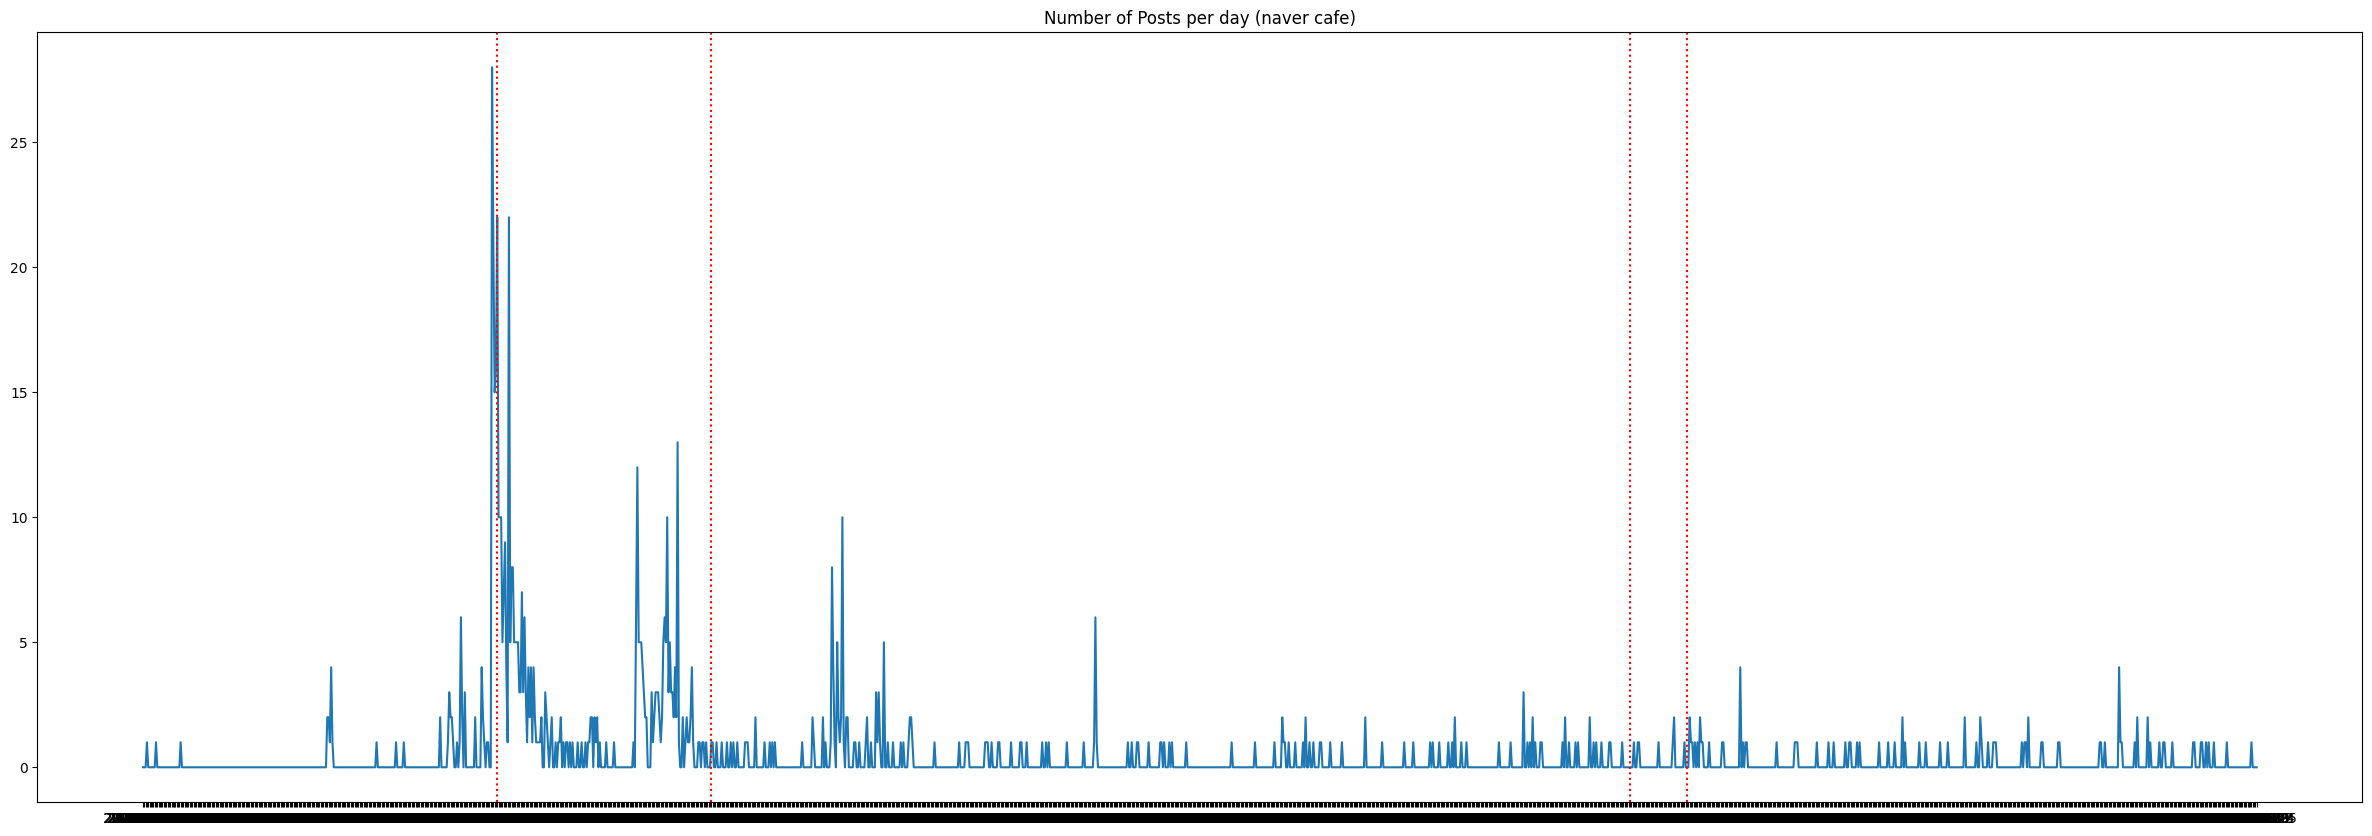

2018년 4월 12일 코나 EV 출시 
2020년 10월 8일 2017년 9월 29일부터 2020년 3월 13일까지 생산된 코나 일렉트릭 25,564대를 리콜 
2021년 3월 22일 전량 배터리 리콜 결정
2021년 4월 코나 EV 단종
2023년 2월 28일 코나 EV 2세대 디자인 필름 공개
2023년 4월 13일 코나 EV 2세대 정식 출시


In [55]:
vis_df = plot_per_day_post_conut_plt(naver_cafe_posts_df, 'Number of Posts per day (naver cafe)')
print(
"2018년 4월 12일 코나 EV 출시 \n\
2020년 10월 8일 2017년 9월 29일부터 2020년 3월 13일까지 생산된 코나 일렉트릭 25,564대를 리콜 \n\
2021년 3월 22일 전량 배터리 리콜 결정\n\
2021년 4월 코나 EV 단종\n\
2023년 2월 28일 코나 EV 2세대 디자인 필름 공개\n\
2023년 4월 13일 코나 EV 2세대 정식 출시"
)

In [15]:
# vis_df = plot_per_day_post_conut(fm_korea_posts_df, 'Number of Posts per day (fm korea)')

In [16]:
# vis_df = plot_per_day_post_conut(naver_cafe_posts_df, 'Number of Posts per day (naver cafe)')

In [17]:
# vis_df = plot_per_day_post_conut(posts_df, 'Number of Posts per day (total)')